# 2.1. Problem Statement: Machine Learning 7

#### In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season. 
 
#### A look at the data 
 
#### Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
with open("nba_2013.csv", 'r') as csvfile:
    nba_raw = pd.read_csv(csvfile)
nba_raw.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [2]:
nba_raw.shape

(481, 31)

In [3]:
# Data Preprocessing
# Replace NaN values with zeros
nba = nba_raw.fillna(0)

# Convert strings to NaN and drop.
nba = nba.convert_objects(convert_numeric=True).dropna()
nba.head()

C:\Users\abdewang.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
print("nba.columns.values:", nba.columns.values)

nba.columns.values: ['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [5]:
# Featured Columns
X = pd.concat([nba.iloc[:,2:3],nba.iloc[:,4:28]],sort = False,axis = 1).values
# The column that we want to predict.
y = nba["pts"].values

In [6]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#Fitting Knn Classifier to the Training set
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [9]:
#Predicting the Test set results
y_pred = knn.predict(X_test)

In [10]:
# Model Evaluation
#find out r-squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print("R2 Score : ",r2_score)
# find out mean suqred error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse) 

R2 Score :  0.9608607482856512
Mean Square Error :  7495.904329896908
Root Mean Square Error :  86.57889078694014


# 2.2. Problem Statement: Machine Learning 8

#### In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage. 

In [11]:
#Import the libraries
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 

In [12]:
#Fetching url and the html
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 

In [13]:
#Extracting text
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token)
#Frequency Disribution
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

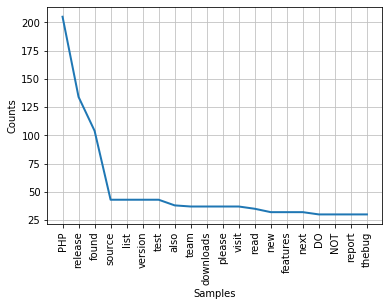

In [14]:
#Visualization
freq.plot(20,cumulative=False)

# 2.3. Problem Statement: Machine Learning 9 

#### In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [15]:
#Import the libraries
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

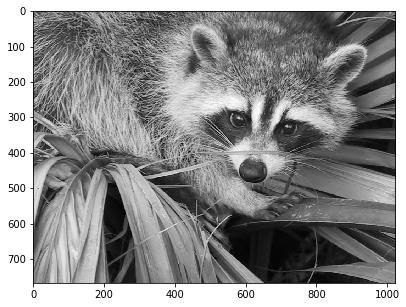

In [16]:
# Visualize the gray scale image
f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 5))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [17]:
# Compressing the gray scale image into 5 clusters
rows = f.shape[0]
cols = f.shape[1]

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols)

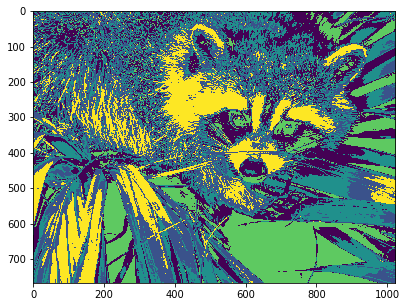

In [18]:
# Visualize the compressed image
plt.imsave('compressed_racoon.png',labels);
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.show()

# 2.4. Problem Statement: Machine Learning 10

#### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour  each data point with specific class. 

In [19]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [20]:
#Import the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [21]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [22]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [23]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [24]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

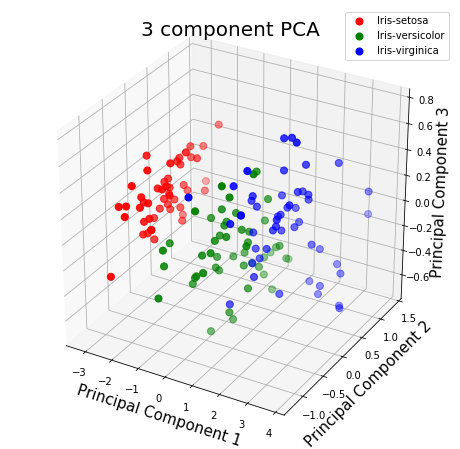

In [25]:
#Visualization
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# 2.5. Problem Statement: Machine Learning 11

#### In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [26]:
#Import the libraries
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Import the dataset
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')

sales = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",index_col =0, parse_dates=[0],date_parser = parser)
sales.head()

,sales
month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


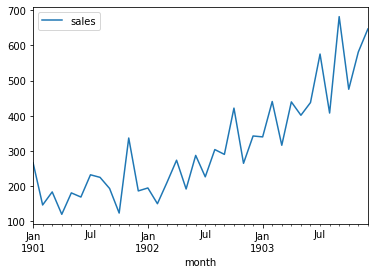

In [28]:
sales.plot()

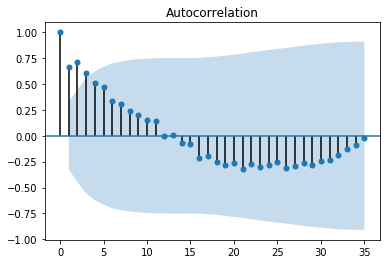

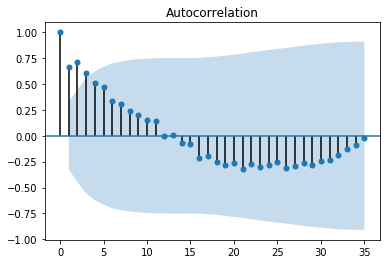

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [30]:
# From the above graphs we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require diffrencing to make it stationary.
sales.head()

,sales
month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [31]:
sales.shift(1)

,sales
month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [32]:
sales_diff = sales.diff(periods=1)
sales_diff.head()
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

,sales
month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0


In [33]:
sales_diff = sales_diff[1:]
sales_diff.head()

,sales
month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


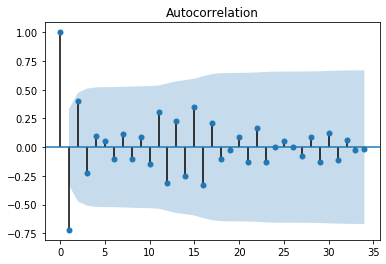

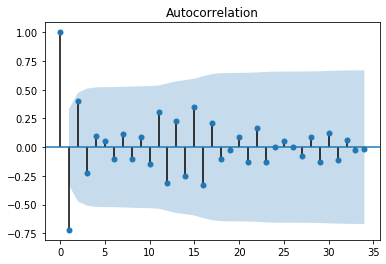

In [34]:
plot_acf(sales_diff)

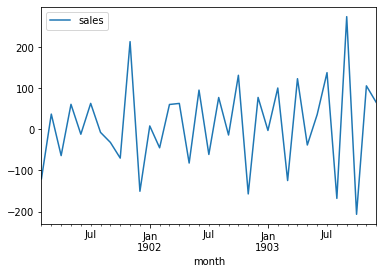

In [35]:
sales_diff.plot()

In [36]:
X = sales.values
size = int(len(X)*0.60)
print(len(X))
print(size)

36
21


In [37]:
train,test = X[0:size], X[size:len(X)]

In [38]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [43]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 234.9058235692504
(0, 0, 1) 236.90567006673552
(0, 0, 2) 238.0855970245343
(0, 0, 3) 239.74303850668383
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 237.4687327207611
(0, 1, 1) 224.97198512436265
(0, 1, 2) 225.0430405184099
(0, 2, 0) 248.20220917004352
(0, 2, 1) 231.38054670422466
(1, 0, 0) 236.9056020727857
(1, 1, 0) 229.53210703041685
(1, 1, 1) 225.3000272384869
(1, 1, 2) 228.97231650113122
(1, 2, 0) 233.07408211092235
(2, 0, 0) 237.76764243241672
(2, 1, 0) 230.745931296246
(2, 1, 1) 227.2987990191286
(2, 1, 2) 229.11275512888065
(2, 1, 5) 232.92773869491563
(2, 2, 0) 232.2320267558407
(2, 2, 1) 225.81446851493178
(3, 0, 0) 239.73729776383243
(3, 1, 0) 229.7101827332516
(3, 1, 1) 227.7296010445762
(3, 1, 2) 229.80306549281636
(3, 2, 0) 230.97001204375954
(3, 2, 1) 225.27024728097035
(3, 2, 2) 225.24825075890504
(3, 2, 3) 225.5760064427527
(4, 0, 0) 241.25845091969597
(4, 1, 0) 229.1362896421745
(4, 1, 1) 231.04813409730724
(4, 1, 2) 231.6689327879053
(4, 1, 5) 232.85386026223102
(

It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=0, d=1 and q=1 is the best because of lowest AIC value

In [40]:
#ARIMA Model


from statsmodels.tsa.arima_model import ARIMA
history = [X for X in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model = model.fit()
    output = model.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    y_obs = test[t]
    history.append(y_obs)
    print('predicted=%f, Expected=%f' %(y_hat,y_obs))

predicted=262.213433, Expected=421.600000
predicted=290.792749, Expected=264.500000
predicted=299.040479, Expected=342.300000
predicted=309.689166, Expected=339.700000
predicted=321.386748, Expected=440.400000
predicted=343.333655, Expected=315.900000
predicted=351.523172, Expected=439.300000
predicted=367.900614, Expected=401.300000
predicted=391.075085, Expected=437.400000
predicted=413.183291, Expected=575.500000
predicted=470.911285, Expected=407.600000
predicted=459.248688, Expected=682.000000
predicted=536.238718, Expected=475.300000
predicted=525.685682, Expected=581.300000
predicted=552.963240, Expected=646.900000


In [41]:
# Model Evaluation
# find out mean suqred error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions)) 
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse)

Mean Square Error :  10023.616313496077
Root Mean Square Error :  100.11801193339826


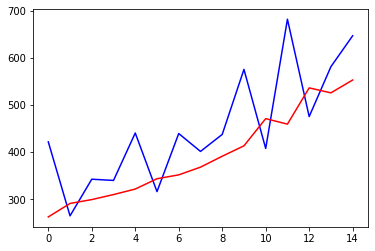

In [42]:
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()